In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Remove columns with more than 40% null values

df = df.dropna(axis=1, thresh=600)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [18]:
# keep only numeric columns from df

df = df.select_dtypes(include=['int64', 'float64'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

# Analyzing dependant variable

In [19]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/miguel.d.ferrusca/Documents/ironhack/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


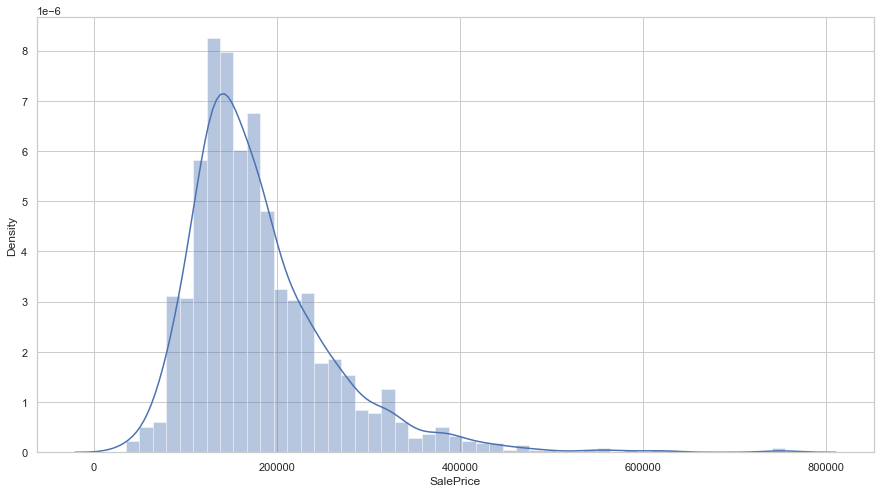

In [20]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")


sns.distplot(df.SalePrice)

plt.show()

/Users/miguel.d.ferrusca/Documents/ironhack/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

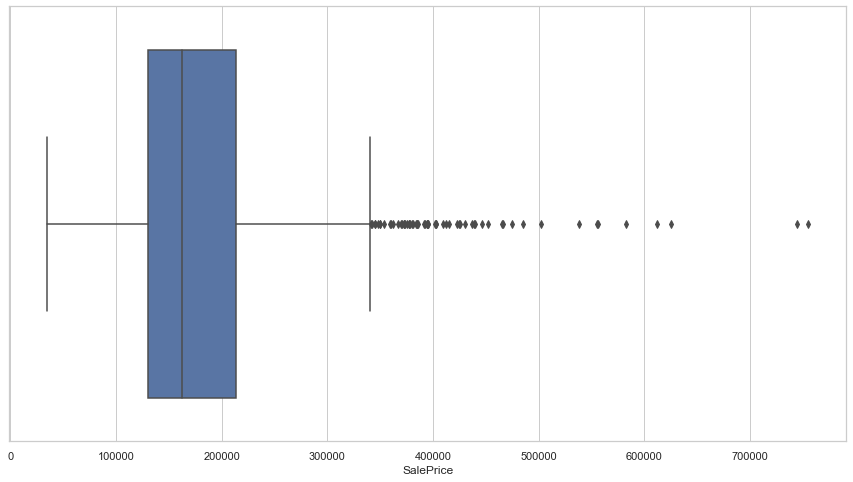

In [21]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")


sns.boxplot(df.SalePrice)

<AxesSubplot:>

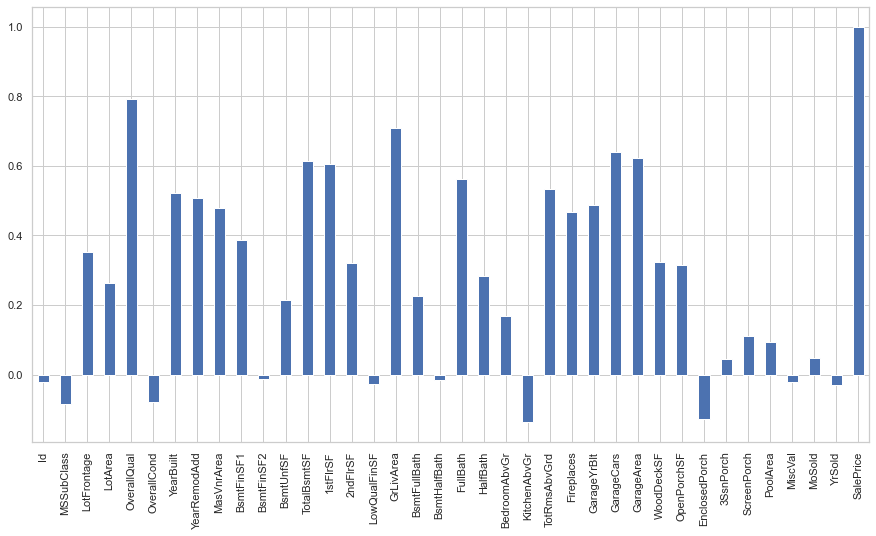

In [41]:
correlation = df.corr()

plt.figure(figsize=(15,8))

correlation.SalePrice.plot(kind='bar')

In [91]:
influencing_columns = correlation[['SalePrice']]

print(influencing_columns.shape)

influencing_columns = influencing_columns[influencing_columns['SalePrice']>.0000001]

influencing_columns.index

(7, 1)


Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')

<AxesSubplot:>

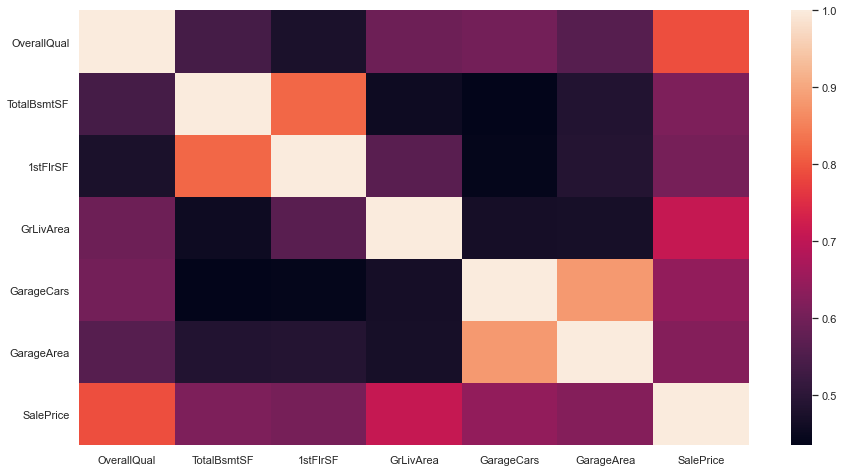

In [92]:
correlation = df.corr()

correlation = correlation[influencing_columns.index]

correlation = correlation.loc[influencing_columns.index]


plt.figure(figsize=(15,8))


sns.heatmap(correlation)

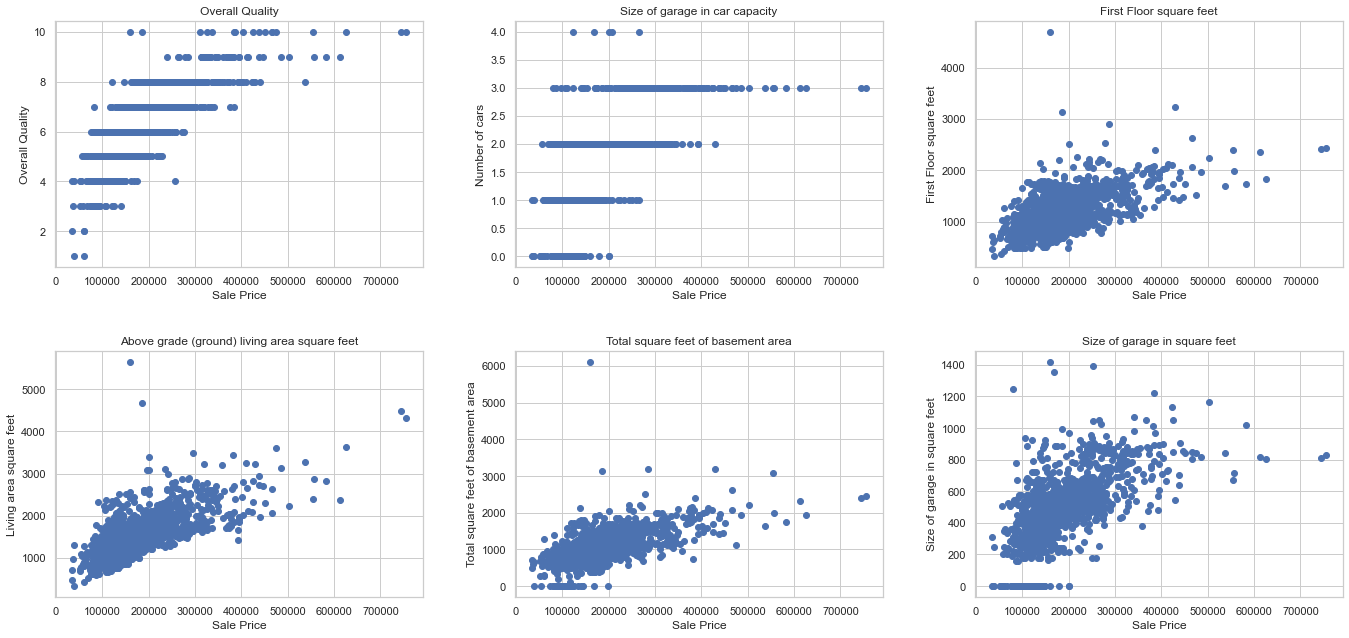

In [103]:
fig, ax = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20,10))

fig.tight_layout(pad=5.0)


ax[0,0].scatter(df.SalePrice, df.OverallQual)
ax[0,0].set_title('Overall Quality')
ax[0,0].set_xlabel('Sale Price')
ax[0,0].set_ylabel('Overall Quality')


ax[0,1].scatter(df.SalePrice, df.GarageCars)
ax[0,1].set_title('Size of garage in car capacity')
ax[0,1].set_xlabel('Sale Price')
ax[0,1].set_ylabel('Number of cars')


ax[0,2].scatter(df.SalePrice, df['1stFlrSF'])
ax[0,2].set_title('First Floor square feet')
ax[0,2].set_xlabel('Sale Price')
ax[0,2].set_ylabel('First Floor square feet')

ax[1,0].scatter(df.SalePrice, df.GrLivArea)
ax[1,0].set_title('Above grade (ground) living area square feet')
ax[1,0].set_xlabel('Sale Price')
ax[1,0].set_ylabel('Living area square feet')


ax[1,1].scatter(df.SalePrice, df.TotalBsmtSF)
ax[1,1].set_title('Total square feet of basement area')
ax[1,1].set_xlabel('Sale Price')
ax[1,1].set_ylabel('Total square feet of basement area')


ax[1,2].scatter(df.SalePrice, df.GarageArea)
ax[1,2].set_title('Size of garage in square feet')
ax[1,2].set_xlabel('Sale Price')
ax[1,2].set_ylabel('Size of garage in square feet')


plt.show()